<img src="wine.jpg" width="400">

<h1 align="center">"Worth It" Wines</h1>
<h2 align="center">Christopher Yue and Vishal Hundal and Naman Mittal</h2>

# Table of Contents
1. Introduction
2. Data Cleansing
3. Exploratory Data Analysis
4. Conclusion
5. Resources

# 1. Introduction

The majority of us have been on a budget at one point in our lives (I still am), and let's face it: it's hard to live frugally and have a good time. Sometimes you just want to kick your feet up and relax with a nice, crisp glass of Chardonnay, but all you have are some Solo cups and a box of Franzia.    
In an attempt to put an end to this nationwide crisis, we are going for the top 25 wine brands that offer the best quality wine for the lowest prices. Using a dataset of 150,930 wine reviews from Kaggle (taken from Winemag.com), we will first analyze the relationship between the price of a wine and the score it received in a review. Then we will define what makes a wine "worth it" and find the top 25 most worth it wines.

# 2. Data Cleansing

In [207]:
from scipy import stats
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [208]:
table = pd.read_csv('winemag-data_first150k.csv')

# Drop unnecessary column
table.drop(['Unnamed: 0'], axis=1, inplace=True)

# Rearrange columns
table = table[['country', 'variety', 'description', 'province', 'region_1', 'region_2', 'winery', 
               'designation', 'price', 'points']]

# Drop rows with missing entries
table = table.dropna()
table

,country,variety,description,province,region_1,region_2,winery,designation,price,points
0,US,Cabernet Sauvignon,This tremendous 100% varietal wine hails from ...,California,Napa Valley,Napa,Heitz,Martha's Vineyard,235.0,96
2,US,Sauvignon Blanc,Mac Watson honors the memory of a wine once ma...,California,Knights Valley,Sonoma,Macauley,Special Selected Late Harvest,90.0,96
3,US,Pinot Noir,"This spent 20 months in 30% new French oak, an...",Oregon,Willamette Valley,Willamette Valley,Ponzi,Reserve,65.0,96
8,US,Pinot Noir,This re-named vineyard was formerly bottled as...,Oregon,Chehalem Mountains,Willamette Valley,Bergström,Silice,65.0,95
9,US,Pinot Noir,The producer sources from two blocks of the vi...,California,Sonoma Coast,Sonoma,Blue Farm,Gap's Crown Vineyard,60.0,95
11,US,Pinot Noir,"From 18-year-old vines, this supple well-balan...",Oregon,Ribbon Ridge,Willamette Valley,Patricia Green Cellars,Estate Vineyard Wadensvil Block,48.0,95
12,US,Pinot Noir,A standout even in this terrific lineup of 201...,Oregon,Dundee Hills,Willamette Valley,Patricia Green Cellars,Weber Vineyard,48.0,95
14,US,Pinot Noir,"With its sophisticated mix of mineral, acid an...",Oregon,Dundee Hills,Willamette Valley,Domaine Serene,Grace Vineyard,185.0,95
15,US,Chardonnay,"First made in 2006, this succulent luscious Ch...",Oregon,Willamette Valley,Willamette Valley,Bergström,Sigrid,90.0,95
16,US,Cabernet Sauvignon,"This blockbuster, powerhouse of a wine suggest...",California,Diamond Mountain District,Napa,Hall,Rainin Vineyard,325.0,95


# 3. Exploratory Data Analysis

## 3.1. Removing Duplicates

In [209]:
def check_for_dups(df):
    seen = set()
    dups = set()
    num_dups = 0
    for index, row in df.iterrows():
        # Check if already seen or not
        if row['description'] not in seen:
            seen.add(row['description'])
        else:
            dups.add(row['description'])
            num_dups += 1
            
    return dups, num_dups

Duplicate entries can really mess with data analysis, especially if there are a lot of a specific entry. For example, if we were to try to get the mean wine price from this dataset while the data included 1000 duplicate reviews of a $1,000 wine, the calculated mean would be much higher than it actually is.
To see if duplicates are an issue, I want to check specifically the description column for duplicate entries, because two wines could coincidentally have other features that perfectly match (e.g. region, price, points). The description, however, must be unique to a review.

In [210]:
dups, num_dups = check_for_dups(table)
# Truncated due to length
print('Some of the duplicates: ')
dups[0:10]

Some of the duplicates: 


TypeError: 'set' object is not subscriptable

There seem to be a lot of duplicate descriptions. Let's take a look at exactly how many of those reviews were duplicates.

In [ ]:
print('Number of duplicates: {}'.format(num_dups))
print('Percentage duplicates: {}%'.format(num_dups * 100 / len(table)))

In [ ]:
table.drop_duplicates('description', inplace=True)

In [ ]:
dups, num_dups = check_for_dups(table)
print('Number of duplicates: {}'.format(num_dups))

As you can see, approximately 35% of our original data consisted of duplicates. That's a lot of duplicates!
We took care of this issue by simply dropping all of the rows that contain duplicate descriptions from our data. After running the code above, we are now duplicate-free.

In [ ]:
table

## 3.2. Data Visualization

In [ ]:
sns.distplot(a=table['points'])

In [ ]:
sns.distplot(a=table['price'])

It looks like there are some outliers that are distorting the graph. We can remove them, normalize the data and then plot the graph again.

In [211]:
table = table[np.abs(table['points'] - table['points'].mean()) <= (3*table['points'].std())]
table = table[np.abs(table['price'] - table['price'].mean()) <= (3*table['price'].std())]

In [212]:
# Normalize the data
table['normalized_points'] = (table['points'] - table['points'].mean()) / table['points'].std()
table['normalized_price'] = (table['price'] - table['price'].mean()) / table['price'].std()

After removing outliers from and normalizing our data, the "points" data is a bit less positively skewed and the "price" data is much less skewed. Both graphs now look more like normal distributions (although the second one is still positively skewed). We see that the points mean is about 88 and the price mean is about $36.

The mean is at 88.28524080787157


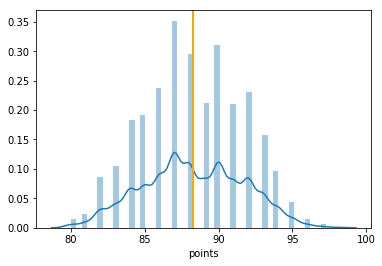

In [213]:
sns.distplot(a=table['points'])
plt.axvline(table['points'].mean(), color="orange", linewidth=2)
print('The mean is at {}'.format(table['points'].mean()))

The mean is at 35.621983428275506


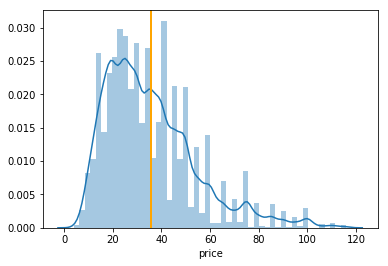

In [214]:
sns.distplot(a=table['price'])
plt.axvline(table['price'].mean(), color="orange", linewidth=2)
print('The mean is at {}'.format(table['price'].mean()))

Taking another look at our data, I am highly suspicious of there being a correlation between the price of a wine and the number of points it receives. We can plot a graph of these two variables to get an idea of their relationship.

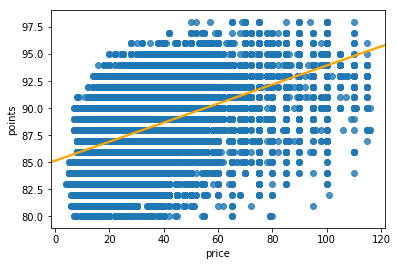

In [215]:
sns.regplot(x=table['price'], y=table['points'], line_kws={'color': 'orange'})

## 3.3. Hypothesis Testing

It looks like there is a rough linear relationship between the price of a wine and the number of points it receives from a review.
We can see how correlated these two continuous variables are by finding the Pearson Correlation Coefficient between them.  
We are also going to perform a hypothesis test:
- Null hypothesis: The Pearson Correlation Coeeficient is not significantly different from 0.
- Alternative hypothesis: The Pearson Correlation Coeeficient is significantly different from 0.
- Significance level: 0.05

In [216]:
print('Pearson Correlation Coefficient: {}'.format(stats.pearsonr(x=table['normalized_price'], 
                                                                  y=table['normalized_points'])[0]))
print('p-value: {}'.format(stats.pearsonr(x=table['normalized_price'], 
                                                                  y=table['normalized_points'])[1]))

Pearson Correlation Coefficient: 0.4895546327685402
p-value: 0.0


A Pearson Correlation Coefficient value of 0.488 means that there is a moderate positive relationship between the price and points of a wine (a value of 1 would represent a positive relationship and a value of -1 would represent a negative relationship). Furthermore, the p-value returned is less than the significance level (it is displayed as 0 because it is so low that Python must round it down), so we have reason to reject the null hypothesis. We can see how much the number of points increases on average for every dollar added to the price.

In [217]:
res = sm.OLS(table['normalized_price'], table['normalized_points']).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       normalized_price   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                 1.217e+04
Date:                Sat, 15 Dec 2018   Prob (F-statistic):               0.00
Time:                        14:40:48   Log-Likelihood:                -49508.
No. Observations:               38620   AIC:                         9.902e+04
Df Residuals:                   38619   BIC:                         9.903e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
normalized_points     0.4896      0.00

Although we have rejected the null hypothesis, the R^2 value returned above indicates that the fitted line only explains only 23.8% of the variability of the response data (points) around its mean. In other words, the fitted line is only a 23.8% "good" fit.  
Looking back at the scatter plot with the regression line (the graph has been reproduced below), it is clear that the data is spread out far from the fitted line. This graph is quite interesting to look at, as we can see that there are tons of cheaper wine brands scoring high and more expensive wine brands scoring low in the reviews. Our goal is to find the cheaper brands that scored high.

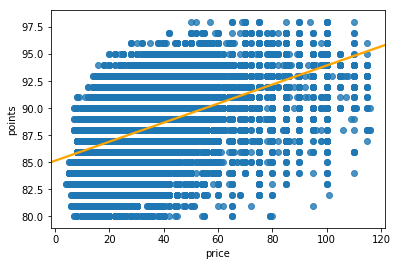

In [218]:
sns.regplot(x=table['price'], y=table['points'], line_kws={'color': 'orange'})

## 3.4. Defining the "Worth It Score"

Now, let's determine how we should actually measure how "worth it" a wine is. We could simply say that the worth it-ness of a wine is measured by the number of points the wine received divided by the price of the wine (worth it score = points / price). This way, the lower the price and the higher the points, the more worth it a wine is. We can add this quantity as a feature column for our current dataset by calculating this number for each observation. I'm going to call this number the "worth score."

In [219]:
worth_score = (table['points'] / table['price'])
worth_score = (worth_score - worth_score.mean()) / worth_score.std()
worth_score = pd.DataFrame({'worth_score': worth_score})
table = pd.concat([table, worth_score], axis=1)

table = table[['country', 'variety', 'description', 'province', 'region_1', 'region_2', 'winery', 'designation', 
               'price', 'points', 'worth_score']]
table.head()

,country,variety,description,province,region_1,region_2,winery,designation,price,points,worth_score
2,US,Sauvignon Blanc,Mac Watson honors the memory of a wine once ma...,California,Knights Valley,Sonoma,Macauley,Special Selected Late Harvest,90.0,96,-1.210916
3,US,Pinot Noir,"This spent 20 months in 30% new French oak, an...",Oregon,Willamette Valley,Willamette Valley,Ponzi,Reserve,65.0,96,-0.982066
8,US,Pinot Noir,This re-named vineyard was formerly bottled as...,Oregon,Chehalem Mountains,Willamette Valley,Bergström,Silice,65.0,95,-0.990648
9,US,Pinot Noir,The producer sources from two blocks of the vi...,California,Sonoma Coast,Sonoma,Blue Farm,Gap's Crown Vineyard,60.0,95,-0.922709
11,US,Pinot Noir,"From 18-year-old vines, this supple well-balan...",Oregon,Ribbon Ridge,Willamette Valley,Patricia Green Cellars,Estate Vineyard Wadensvil Block,48.0,95,-0.701905


In [220]:
print('Lowest worth score: {}'.format(table['worth_score'].min()))
print('Highest worth score: {}'.format(table['worth_score'].max()))

Lowest worth score: -1.3839211979169677
Highest worth score: 9.768854606740051


Now I want to get a sense of the different varieties of wine. Since our end goal is to somehow find where to find the best wines for the lowest prices, wine varieties could potentially be a good place to look for such "deals."

In [221]:
wineries = table['winery'].unique()
for winery in wineries[0:10]:
    print('Wineries:' + str(winery))
    
print('...')

Wineries:Macauley
Wineries:Ponzi
Wineries:Bergström
Wineries:Blue Farm
Wineries:Patricia Green Cellars
Wineries:Gary Farrell
Wineries:Heitz
Wineries:Center of Effort
Wineries:Comartin
Wineries:Roar
...


In [222]:
print('Number of wineries: {}'.format(len(wineries)))

Number of wineries: 3366


There are 3,395 different wineries in the data. This is quite a large number and may be difficult to perform analysis on, so maybe we should only keep the wineries with the top 25 worth it scores in the data.
Since we're going to be looking at the mean worth it score, we should also first discard any varieties that have too few observations. If one of those varieties were to have a very high or very low worth it score, for example, it may be because the observations of those varieties just so happened to contain such an exreme score.

In [223]:
def get_top_25():
    mean_worth_scores = []

    for winery in wineries:
        mean_worth_score = table['worth_score'].loc[table['winery'] == winery].mean()
        mean_worth_scores.append(mean_worth_score)

    winery_mean_worth_scores = pd.DataFrame({'winery': wineries, 'mean_worth_score': mean_worth_scores})
    winery_mean_worth_scores.sort_values('mean_worth_score', ascending=False, inplace=True)
    return winery_mean_worth_scores.head(25)
top_25 = get_top_25()
top_25

,winery,mean_worth_score
396,Pam's Cuties,9.768855
3331,Bocce,6.003565
2673,Riverside,5.941585
1487,Barefoot Cellars,5.836219
2901,Barefoot,4.927768
3078,Bully Hill,4.887924
2761,Cook's,4.887924
2002,CK Mondavi,4.856252
3307,Hacienda,4.808235
2986,flipflop,4.648858


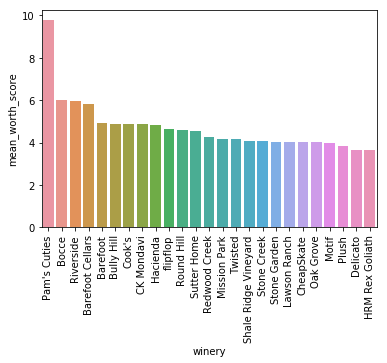

In [224]:
var_worth_plot = sns.barplot(x=top_25['winery'], y=top_25['mean_worth_score'])
for label in var_worth_plot.get_xticklabels():
    label.set_rotation(90)

I'm a bit suspicious of the Pam's Cuties winery having that much higher of a mean worth it score than the second highest holder. Perhaps we can see how many times Pam's Cuties shows up in the data to see if this high mean worth score was purely due to chance.

In [225]:
print('Number of occurences: {}'.format(table['winery'].loc[table['winery'] == 'Pam\'s Cuties'].count()))

Number of occurences: 1


As I suspected, Pam's Cuties only appears in the dataset 1 time. This is a sign that we should probably filter out wineries that have less than a certain number of occurrences in the data. We can get an idea of what this number should be by finding the trimmed mean number of times any winery appears in the data.

In [226]:
winery_counts = table['winery'].value_counts()
winery_counts

Williams Selyem          297
Testarossa               264
Columbia Crest           212
Kendall-Jackson          208
Chateau Ste. Michelle    158
De Loach                 157
Concannon                149
Cameron Hughes           143
Iron Horse               138
Morgan                   133
Gary Farrell             132
Dutton-Goldfield         115
J. Lohr                  115
Dry Creek Vineyard       111
Sineann                  111
Peachy Canyon            108
Adelaida                 108
Rodney Strong            107
Robert Mondavi            99
Raymond                   99
Kenwood                   98
Calera                    97
Joseph Swan Vineyards     96
K Vintners                94
Thomas Fogarty            93
Renwood                   93
Tolosa                    91
Martin Ray                90
Bernardus                 90
Novy                      89
                        ... 
Voila!                     1
Michaud                    1
Stateside                  1
Broman        

In [227]:
print('Mean number of winery occurences: {}'.format(winery_counts.mean()))

Mean number of winery occurences: 11.473559120617944


I think this mean is a good indicator of where we should set the minimum number of times a winery should appear in the dataset. I'm going to mostly-qualitatively set this value to 10. We can now remove any wineries that appear less than 10 times throughout the data.

In [228]:
wineries_kept = set()
for winery in winery_counts.index:
    if winery_counts[winery] >= 7:
        wineries_kept.add(winery)

In [229]:
table = table.loc[table['winery'].isin(wineries_kept)]

In [230]:
print('Number of Wineries Left: {}'.format(len(wineries_kept)))

Number of Wineries Left: 1369


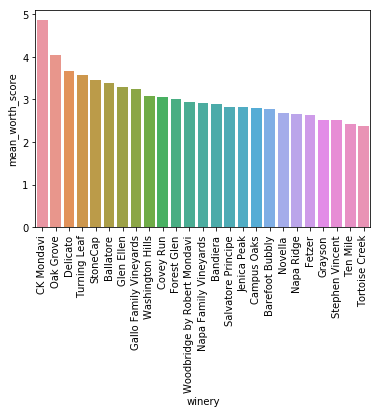

In [231]:
top_25 = get_top_25()

var_worth_plot = sns.barplot(x=top_25['winery'], y=top_25['mean_worth_score'])
for label in var_worth_plot.get_xticklabels():
    label.set_rotation(90)

In [232]:
mean_prices = []
mean_points_arr = []

for winery in wineries:
    mean_price = table['price'].loc[table['winery'] == winery].mean()
    mean_prices.append(mean_price)
    mean_points = table['points'].loc[table['winery'] == winery].mean()
    mean_points_arr.append(mean_points)

winery_mean_prices_points = pd.DataFrame({'winery': wineries, 
                                          'mean_price': mean_prices, 
                                          'mean_points': mean_points_arr})
winery_mean_prices_points.sort_values('mean_price', ascending=True, inplace=True)
winery_mean_prices_points.head(25)

,winery,mean_price,mean_points
2002,CK Mondavi,7.000000,83.307692
768,Oak Grove,8.000000,83.860465
3101,Turning Leaf,9.000000,84.555556
1559,Ballatore,9.142857,84.285714
1182,StoneCap,9.285714,86.642857
1330,Glen Ellen,9.325000,82.625000
1675,Forest Glen,9.833333,84.166667
2262,Jenica Peak,9.937500,82.375000
1335,Napa Family Vineyards,10.000000,84.600000
1377,Washington Hills,10.000000,87.571429


# 4. Conclusion

Although it is true that the number of points a wine receives is correlated with the price of the wine (as determined by the Pearson Correlation Coefficient), as you can see, there are plenty of quality wine brands you could purchase from and not have to break bank. 

CK Mondavi is at the top of our list, and although the wine brand's products are rated at the lower end of the points scale (at around 83.3 points, which is still quite high), the average price of its products is only $7. If you want to spend absolutely as little as possible and still have a glass of quality wine to enjoy, your best bet would be to buy a CK Mondavi branded wine.

The wine brand that received the highest average number of points in our top 25 list is the Magnificent Wine Company, receiving an average of about 87.3 points. Although this wine brand is technically not as worth it as some of the higher worth it-scoring brands, and though the average price of this brand's products is almost double that of CK Mondavi (at $13.50), you would get a higher quality wine from this higher price point.

There is also an array of other brands that you could choose from, including StoneCap -- which provides a great compromise between the low price of CK Mondavi's wines and the quality of the Magnificent Wine Company's wines -- and Barefoot Bubbly 

# Resources

- Dataset: 

https://www.kaggle.com/zynicide/wine-reviews

- We used the following resources to enhance our knowledge about wine that helped us understand the data better:

https://www.winemag.com/2015/01/20/wine-for-beginners/ 
https://www.wine-searcher.com/ 
https://www.winespectator.com/